In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk


In [2]:
#  0 stands for NOT depressed and 1 stands for Depressed
Twitter_df= pd.read_csv("Data/sentiment_tweets.csv")
Twitter_df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
Twitter_df.shape

(10314, 3)

In [4]:
Twitter_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [5]:
# convert dtring to lower case
Twitter_df['message to examine'] = Twitter_df['message to examine'].str.lower()
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [6]:
# Remove URLs from a sample string
def remove_URL(text):
        return re.sub(r'http\S+', "", text)
    
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_URL(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat need to send 'em to my accountant tomo...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [7]:
#remove twitter mentions
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_mentions(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,-,0
3,288,need to send 'em to my accountant tomorrow. o...,0
4,540,add me on myspace!!! myspace.com/lookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [8]:
#remove punctuation
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_punctuation(x))
Twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,,0
3,288,need to send em to my accountant tomorrow odd...,0
4,540,add me on myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now o...,1
10310,802310,what do you do when depression succumbs the br...,1
10311,802311,ketamine nasal spray shows promise against dep...,1
10312,802312,dont mistake a bad day with depression everyon...,1


In [9]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashitarakesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
Twitter_df['message to examine'] = Twitter_df['message to examine'].apply(lambda x: remove_stopwords(x))
Twitter_df.tail()

,Index,message to examine,label (depression result)
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1
10313,802313,0,1


In [11]:
#remove Numbers
def remove_punctuation(text):
  return re.sub(r'[0-9]+', '', text)

# Twitter_df['message to examine'] = Twitter_df['message to examine'].str.replace('\d+', '')
Twitter_df.rename(columns = {'message to examine':'Tweets','label (depression result)':'Label'}, inplace = True)
Twitter_df

,Index,Tweets,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,,0
3,288,need send em accountant tomorrow oddly wasnt e...,0
4,540,add myspace myspacecomlookthunder,0
...,...,...,...
10309,802309,depression g herbo mood im done stressing peop...,1
10310,802310,depression succumbs brain makes feel like youl...,1
10311,802311,ketamine nasal spray shows promise depression ...,1
10312,802312,dont mistake bad day depression everyone em,1


In [12]:
# Drop empty columns .Replace empty columns with nan
Twitter_df['Tweets'].replace('', np.nan, inplace=True)
Twitter_df
# Drop columns with nan
Twitter_df.dropna(subset=['Tweets'], inplace=True)
len(Twitter_df)

10283

In [13]:
#Save the clean twitter csv
Twitter_df.to_csv("Data/sentiment_twitter_clean.csv", index=False)

In [14]:
tweets = Twitter_df['Tweets'].tolist()
len(tweets)

10283

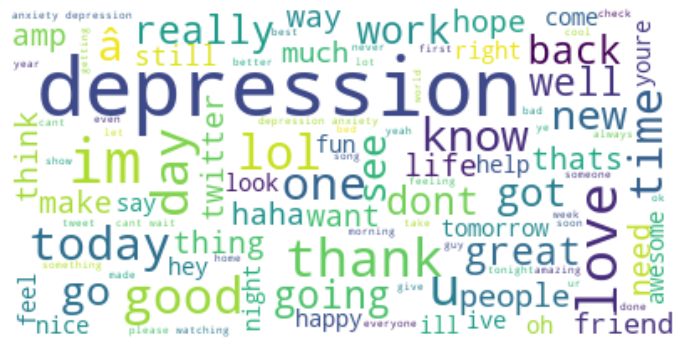

In [15]:
# Combining all the tweets
combined_tweets = " ".join(tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("Images/sentiment.png")

In [16]:
positive_tweets = Twitter_df[Twitter_df['Label'] == 0]
positive_message= positive_tweets['Tweets'].tolist()
combined_positive_tweets = " ".join(positive_message)

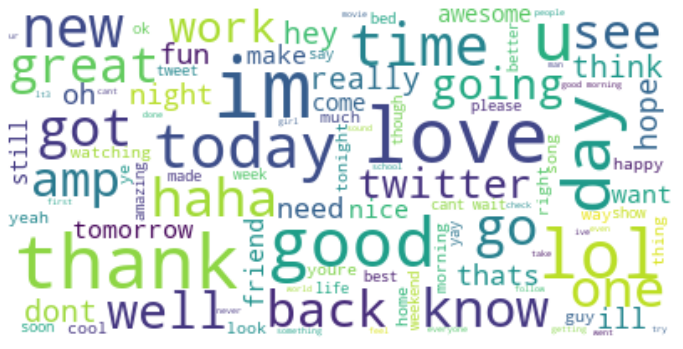

In [17]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_positive_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("Images/positive.png")

In [18]:
negative_tweets = Twitter_df[Twitter_df['Label'] == 1]
negative_message= negative_tweets ['Tweets'].tolist()
combined_negative_tweets = " ".join(negative_message)

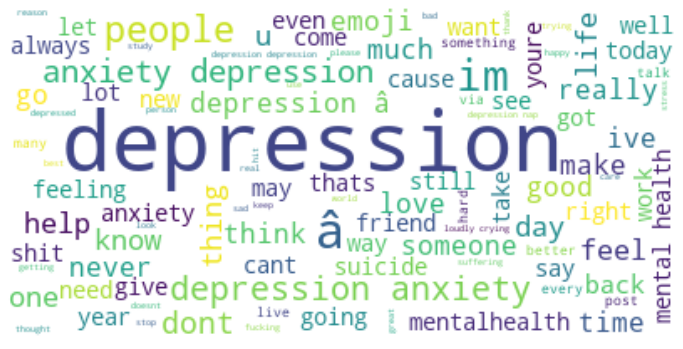

In [19]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(combined_negative_tweets)
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# Save the image in the img folder:
wordcloud.to_file("Images/negative.png")

## Logistic Regression Model

In [ ]:
# Twitter_df['tokenized_tweets'] = Twitter_df.apply(lambda row: nltk.word_tokenize(row['Tweets']), axis=1)
# Twitter_df

In [ ]:
# X= Twitter_df.tokenized_tweets
# y=Twitter_df.Label

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000)
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(Twitter_df['Tweets'])
y=Twitter_df.Label

In [21]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

In [22]:
X_train.shape, X_test.shape

((7198, 17313), (3085, 17313))

In [23]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()


In [24]:
# Fit (train) or model using the training data
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Validate the model using the test data

print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9963878855237566
Testing Data Score: 0.9893030794165316


In [26]:
# Make predictions
predictions = lr_model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})
# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

,Prediction,Actual
4609,0,0
6046,0,0
1231,0,0
5795,0,0
8618,1,1
...,...,...
9017,1,1
7848,0,0
9331,1,1
5007,0,0


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9893030794165316


## Neural Network / Deep Learning Model

In [28]:
X_train.shape, X_test.shape

((7198, 17313), (3085, 17313))

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler(with_mean=False).fit(X_train)

## Data Preprocessing

In [30]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

## Defining our Model Architecture (the layers)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
number_inputs = X.shape[1]
model.add(Dense(units=6, activation='relu', input_dim=number_inputs))
model.add(Dense(units=2, activation='softmax'))

## Model Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 103884    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 103,898
Trainable params: 103,898
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [35]:
X_train_scaled.shape


(7198, 17313)

In [36]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 7198 samples
Epoch 1/100
7198/7198 - 4s - loss: 0.4694 - accuracy: 0.8281
Epoch 2/100
7198/7198 - 2s - loss: 0.0808 - accuracy: 0.9793
Epoch 3/100
7198/7198 - 2s - loss: 0.0297 - accuracy: 0.9907
Epoch 4/100
7198/7198 - 2s - loss: 0.0170 - accuracy: 0.9943
Epoch 5/100
7198/7198 - 2s - loss: 0.0116 - accuracy: 0.9958
Epoch 6/100
7198/7198 - 2s - loss: 0.0088 - accuracy: 0.9965
Epoch 7/100
7198/7198 - 2s - loss: 0.0074 - accuracy: 0.9971
Epoch 8/100
7198/7198 - 2s - loss: 0.0064 - accuracy: 0.9969
Epoch 9/100
7198/7198 - 2s - loss: 0.0058 - accuracy: 0.9969
Epoch 10/100
7198/7198 - 2s - loss: 0.0051 - accuracy: 0.9974
Epoch 11/100
7198/7198 - 2s - loss: 0.0048 - accuracy: 0.9974
Epoch 12/100
7198/7198 - 2s - loss: 0.0045 - accuracy: 0.9974
Epoch 13/100
7198/7198 - 2s - loss: 0.0043 - accuracy: 0.9975
Epoch 14/100
7198/7198 - 2s - loss: 0.0040 - accuracy: 0.9976
Epoch 15/100
7198/7198 - 2s - loss: 0.0039 - accuracy: 0.9975
Epoch 16/100
7198/7198 - 2s - loss: 0.0035 - accuracy: 0.

## Deep Learning Model

In [37]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=number_inputs))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [38]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 103884    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 103,940
Trainable params: 103,940
Non-trainable params: 0
_________________________________________________________________


In [39]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 7198 samples
Epoch 1/100
7198/7198 - 4s - loss: 0.5297 - accuracy: 0.7301
Epoch 2/100
7198/7198 - 2s - loss: 0.1230 - accuracy: 0.9622
Epoch 3/100
7198/7198 - 2s - loss: 0.0342 - accuracy: 0.9925
Epoch 4/100
7198/7198 - 2s - loss: 0.0162 - accuracy: 0.9975
Epoch 5/100
7198/7198 - 2s - loss: 0.0100 - accuracy: 0.9986
Epoch 6/100
7198/7198 - 2s - loss: 0.0074 - accuracy: 0.9989
Epoch 7/100
7198/7198 - 2s - loss: 0.0063 - accuracy: 0.9989
Epoch 8/100
7198/7198 - 3s - loss: 0.0050 - accuracy: 0.9992
Epoch 9/100
7198/7198 - 3s - loss: 0.0044 - accuracy: 0.9992
Epoch 10/100
7198/7198 - 2s - loss: 0.0041 - accuracy: 0.9992
Epoch 11/100
7198/7198 - 2s - loss: 0.0039 - accuracy: 0.9992
Epoch 12/100
7198/7198 - 2s - loss: 0.0038 - accuracy: 0.9992
Epoch 13/100
7198/7198 - 2s - loss: 0.0034 - accuracy: 0.9993
Epoch 14/100
7198/7198 - 2s - loss: 0.0032 - accuracy: 0.9993
Epoch 15/100
7198/7198 - 2s - loss: 0.0032 - accuracy: 0.9993
Epoch 16/100
7198/7198 - 2s - loss: 0.0031 - accuracy: 0.

## Quantify and Compare the models below

In [40]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

3085/3085 - 1s - loss: 1.0932 - accuracy: 0.8804
Normal Neural Network - Loss: 1.0931845774816733, Accuracy: 0.8803889751434326


In [41]:
# Evaluate the deep learning model using the testing data
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

3085/3085 - 1s - loss: 1.0643 - accuracy: 0.8930
Deep Neural Network - Loss: 1.0643105726121835, Accuracy: 0.8930308222770691


## Saving the Model

In [42]:
# Save the model
deep_model.save("Data/twitter_deeplearning.h5")

## Decision Trees

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9225283630470016

In [45]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9329011345218801

## Naive Bayes Model

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [47]:
y_pred=nb_model.predict(X_test)
from sklearn.metrics import classification_report
clf_nb=classification_report(y_test,y_pred)
print(clf_nb)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2399
           1       0.90      0.98      0.94       686

    accuracy                           0.97      3085
   macro avg       0.95      0.97      0.96      3085
weighted avg       0.97      0.97      0.97      3085



## Make Predictions

In [48]:
def preprocess_tweet(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r'http\S+', "", tweet)
    # Remove tweet mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove numbers
    tweet = re.sub(r'[0-9]+', '', tweet)
   # Remove stopwords
    STOPWORDS = set(stopwords.words('english'))
    filtered_words = [word for word in str(tweet).split() if word not in STOPWORDS]
    return " ".join(filtered_words)

In [49]:
def predict_tweet(tweet):
    vectorizer_2 = CountVectorizer()
    tweet_vec= vectorizer_2.fit_transform(tweet)
# make prediction
    tweet_prediction =lr_model.predict(tweet_vec.toarray())
    return tweet_prediction

In [50]:

new_tweet = "Daily inspiration brings new opportunities into your life. We’re in this together!"
print(preprocess_tweet(new_tweet))

sentiment = predict_tweet(new_tweet)

if sentiment == 0:
    print ("Positive Tweet")
else:
    print ("Negative Tweet")

Daily inspiration brings new opportunities life Were together


ValueError: Iterable over raw text documents expected, string object received.